In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Weather_Data.csv')

In [ ]:
df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,6/21/2017,8.6,19.6,0.0,2.0,7.8,SSE,37,W,SSE,...,73,52,1025.9,1025.3,2,2,10.5,17.9,No,No
3267,6/22/2017,9.3,19.2,0.0,2.0,9.2,W,30,W,ESE,...,78,53,1028.5,1024.6,2,2,11.0,18.7,No,No
3268,6/23/2017,9.4,17.7,0.0,2.4,2.7,W,24,WNW,N,...,85,56,1020.8,1015.0,6,6,10.2,17.3,No,No
3269,6/24/2017,10.1,19.3,0.0,1.4,9.3,W,43,W,W,...,56,35,1017.3,1015.1,5,2,12.4,19.0,No,No


In [ ]:
df = df.dropna()

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [ ]:
df = df.drop_duplicates()

In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [ ]:
df.drop(columns=['Date', 'WindGustDir','Rainfall','WindDir9am', 'WindDir3pm','WindSpeed3pm','Humidity3pm', 'Pressure3pm', 'Cloud3pm', 'Temp3pm', 'RainTomorrow', 'MinTemp' ], inplace=True)

In [ ]:
df.rename(columns={'WindSpeed9am': 'WindSpeed', 'Humidity9am': 'Humidity', 'Pressure9am':'Pressure', 'Cloud9am' : 'Cloud', 'Temp9am': 'Temp', 'RainToday': 'Rain'}, inplace=True)

In [ ]:
df

,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp,Rain
0,22.4,6.2,0.0,41,17,92,1017.6,8,20.7,Yes
1,25.6,3.4,2.7,41,9,83,1017.9,7,22.4,Yes
2,24.5,2.4,0.1,41,17,88,1016.7,7,23.5,Yes
3,22.8,2.2,0.0,41,22,83,1014.2,8,21.4,Yes
4,25.7,4.8,0.0,41,11,88,1008.3,8,22.5,Yes
...,...,...,...,...,...,...,...,...,...,...
3266,19.6,2.0,7.8,37,22,73,1025.9,2,10.5,No
3267,19.2,2.0,9.2,30,20,78,1028.5,2,11.0,No
3268,17.7,2.4,2.7,24,15,85,1020.8,6,10.2,No
3269,19.3,1.4,9.3,43,17,56,1017.3,5,12.4,No


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['Rain'] = df['Rain'].apply(lambda x: 1 if x == 'Yes' else 0)

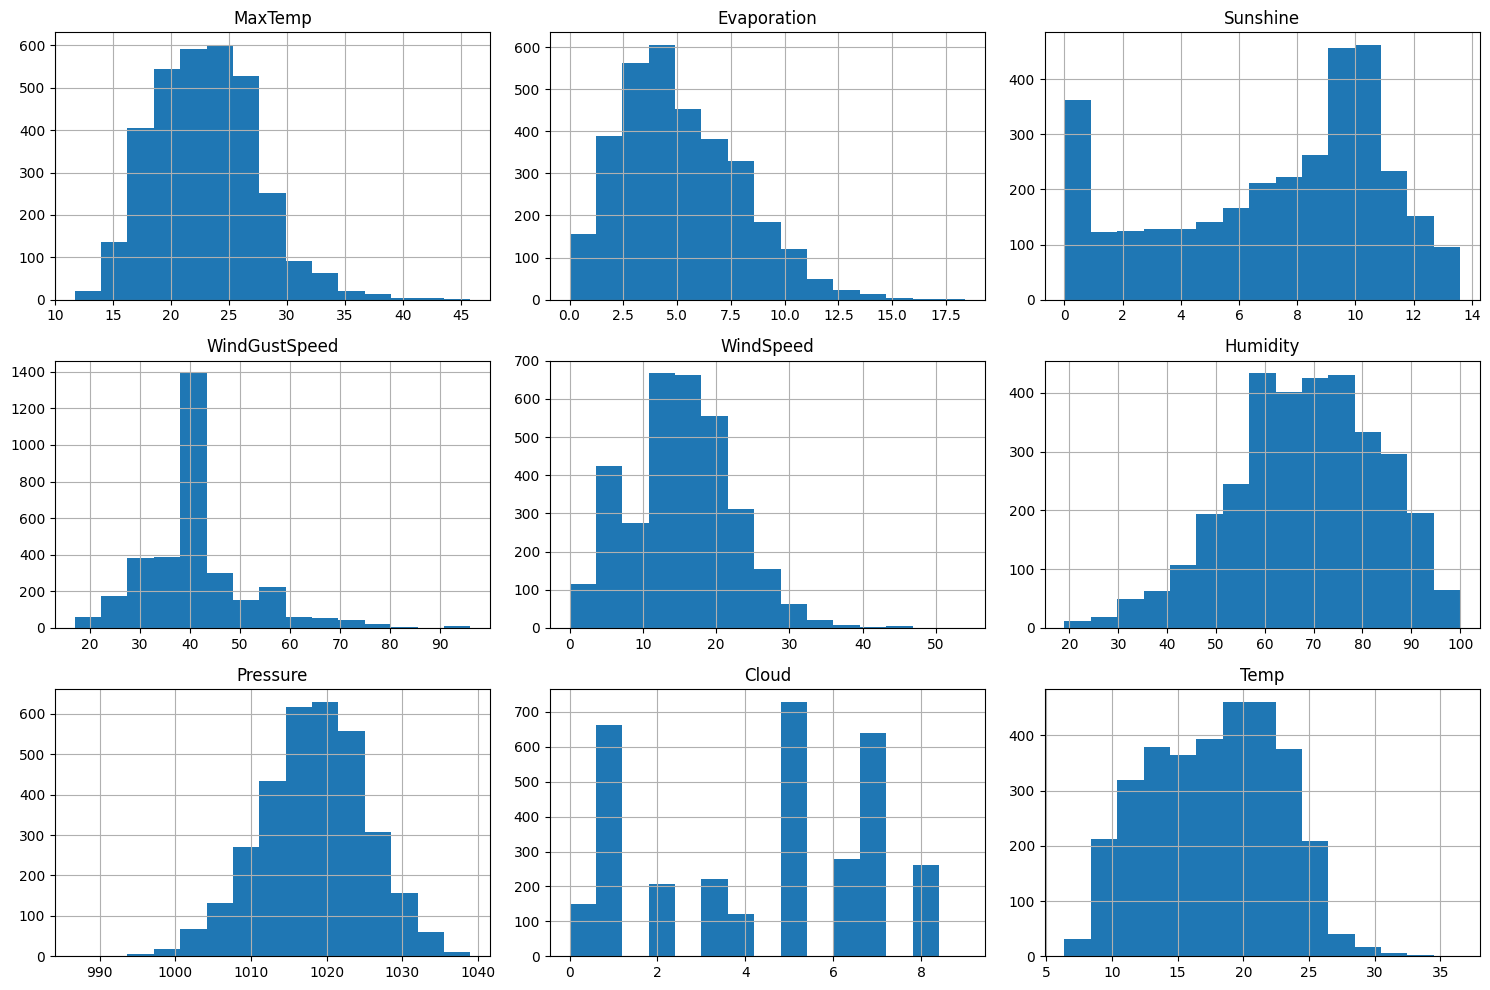

In [ ]:
numerical_features = [ 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                      'WindSpeed', 'Humidity', 'Pressure', 'Cloud', 'Temp']

df[numerical_features].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()


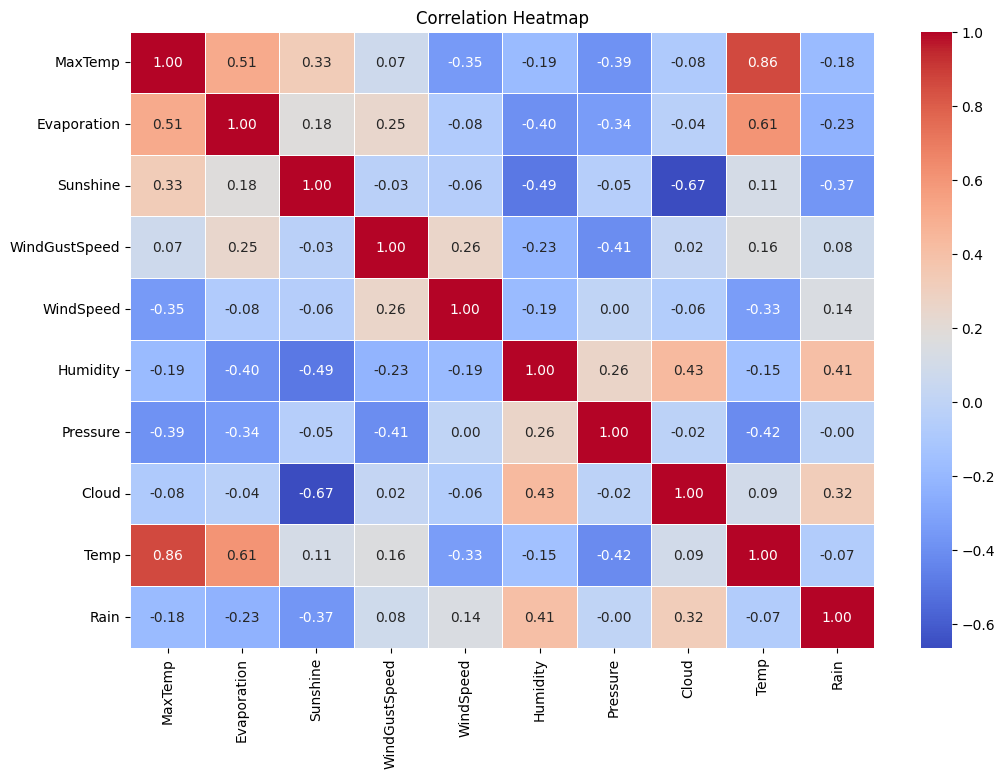

In [ ]:
# Calculate the correlation matrix
corr = df[numerical_features + ['Rain']].corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


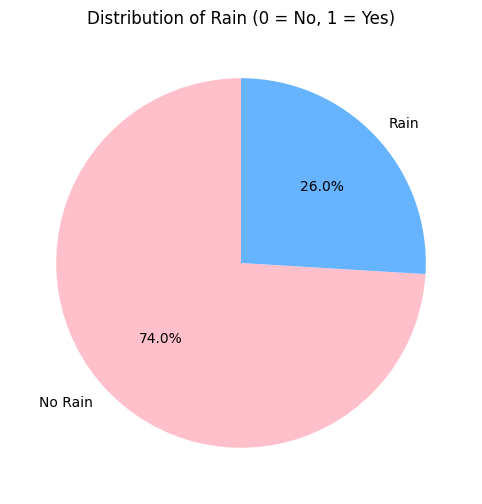

In [ ]:
rain_counts = df['Rain'].value_counts()

plt.figure(figsize=(8, 6))
rain_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], labels=['No Rain', 'Rain'])
plt.title('Distribution of Rain (0 = No, 1 = Yes)')
plt.ylabel('')
plt.show()


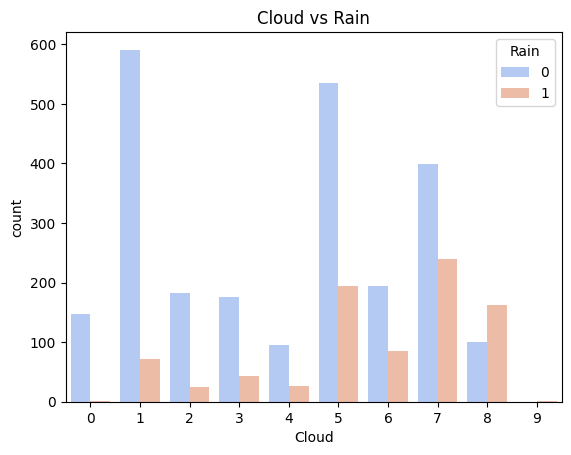

In [ ]:
sns.countplot(data=df, x='Cloud', hue='Rain', palette='coolwarm')
plt.title('Cloud vs Rain')
plt.show()


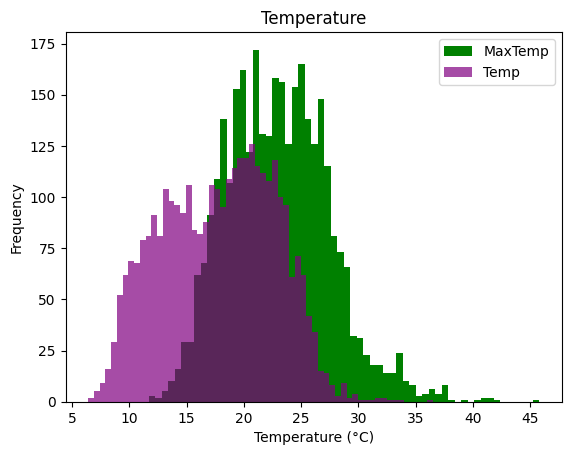

In [ ]:
plt.hist(df['MaxTemp'], bins=60, color='green', label='MaxTemp', alpha=1)
plt.hist(df['Temp'], bins=60, color='purple', label='Temp', alpha=0.7)
plt.title("Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


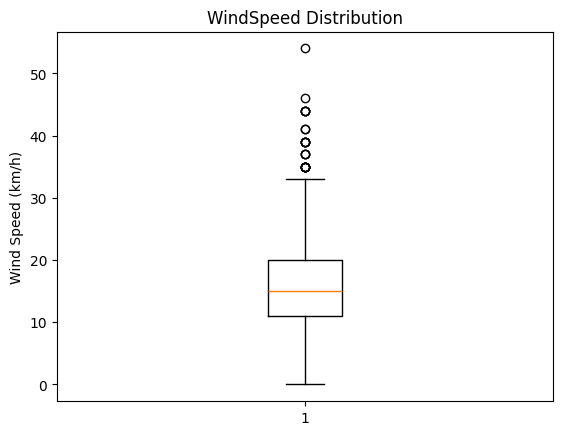

In [ ]:
plt.boxplot(df['WindSpeed'])
plt.title('WindSpeed Distribution')
plt.ylabel('Wind Speed (km/h)')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MaxTemp        3271 non-null   float64
 1   Evaporation    3271 non-null   float64
 2   Sunshine       3271 non-null   float64
 3   WindGustSpeed  3271 non-null   int64  
 4   WindSpeed      3271 non-null   int64  
 5   Humidity       3271 non-null   int64  
 6   Pressure       3271 non-null   float64
 7   Cloud          3271 non-null   int64  
 8   Temp           3271 non-null   float64
 9   Rain           3271 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 255.7 KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X = df[[ 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed',
            'WindSpeed', 'Humidity', 'Pressure', 'Cloud', 'Temp']]
y = df['Rain']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
log_reg = LogisticRegression(max_iter = 3000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [ ]:
y_pred = log_reg.predict(X_test) #hyper parameter, confusion matrix, data visualizzagtion, Title in pdf, conclusion ma comparative analysis, Research, aAlgotithm formula picture and mechanism pic

Accuracy: 0.8153
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       472
           1       0.73      0.53      0.62       183

    accuracy                           0.82       655
   macro avg       0.79      0.73      0.75       655
weighted avg       0.81      0.82      0.81       655

Confusion Matrix:
 [[437  35]
 [ 86  97]]


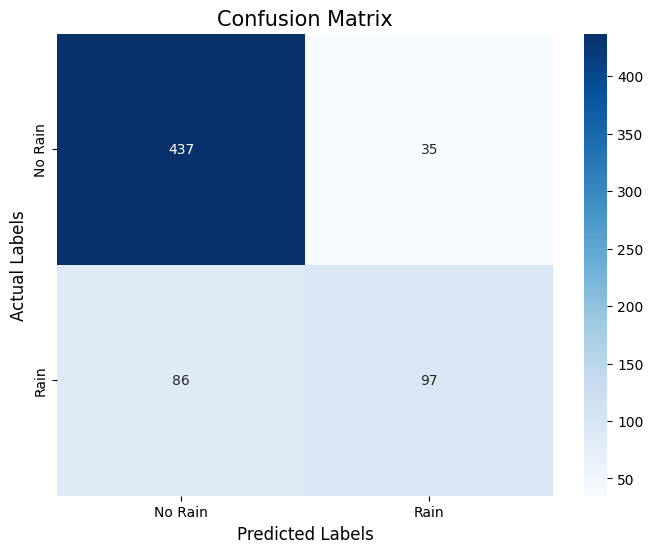

In [ ]:

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])

plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('Actual Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_y_pred = knn.predict(X_test)

Accuracy: 0.7985
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       472
           1       0.67      0.55      0.60       183

    accuracy                           0.80       655
   macro avg       0.75      0.72      0.73       655
weighted avg       0.79      0.80      0.79       655

Confusion Matrix:
 [[423  49]
 [ 83 100]]


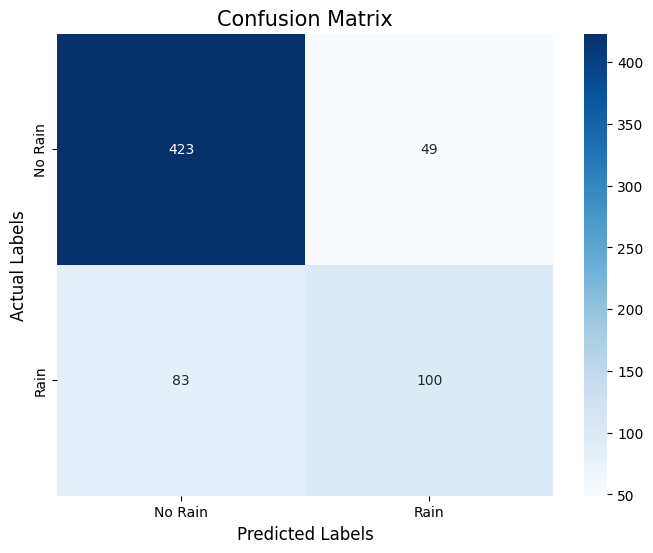

In [ ]:

# Print the accuracy, classification report, and confusion matrix
print(f"Accuracy: {accuracy_score(y_test, knn_y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, knn_y_pred))

conf_matrix = confusion_matrix(y_test, knn_y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])

plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('Actual Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_y_pred = rf.predict(X_test)

Accuracy: 0.8290
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       472
           1       0.78      0.54      0.64       183

    accuracy                           0.83       655
   macro avg       0.81      0.74      0.76       655
weighted avg       0.82      0.83      0.82       655

Confusion Matrix:
 [[444  28]
 [ 84  99]]


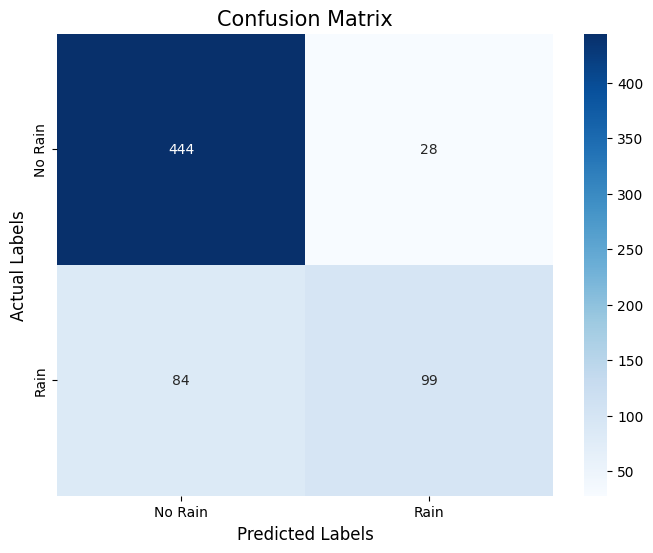

In [ ]:

# Print the accuracy, classification report, and confusion matrix
print(f"Accuracy: {accuracy_score(y_test, rf_y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, rf_y_pred))

conf_matrix = confusion_matrix(y_test, rf_y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])

plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('Actual Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.show()